In [1]:
import textacy
from functools import partial
import pandas as pd
import bamboolib
from tqdm.notebook import tqdm
tqdm.pandas()

In [2]:
data = pd.read_csv('/Users/charlesdedampierre/Desktop/ENS Projects/chinese_fiction/text_chinese_translated.csv')
data = data.reset_index()
data = data[1:].dropna()
#data = data.sample(50, random_state = 42)

#### Chinese to english

In [3]:
#import googletrans
#translator = googletrans.Translator()
#data['text_tranlasted'] = data['text_chinese'].progress_apply(lambda x: translator.translate(x).text)

In [4]:
#all-mpnet-base-v2
#all-MiniLM-L6-v2 
#distiluse-base-multilingual-cased-v1

In [5]:
from bunkatech.bunka_class import Bunka

In [6]:
bunka = Bunka(
        data=data,
        text_var="text_tranlasted",
        index_var="index",
        extract_terms=True,
        terms_embedding=True,
        docs_embedding=False,
        sample_size_terms=2000,
        terms_limit=5000,
        terms_ents=False,
        terms_ngrams=(2, 2),
        terms_ncs=False,
        terms_include_pos=["NOUN", "PROPN", "ADJ"],
        terms_include_types=["PERSON", "ORG"],
        terms_embedding_model="all-MiniLM-L6-v2",
        docs_embedding_model="all-MiniLM-L6-v2",
        language="en",
        terms_path=None,
        terms_embeddings_path=None,
        docs_embeddings_path=None,
        docs_dimension_reduction=5,
    )

Extract Terms: 100%|████████████████████████████████████████████████████████████████| 303/303 [00:17<00:00, 17.03it/s]
2022-03-22 21:55:43,609 - INFO : Load pretrained SentenceTransformer: all-MiniLM-L6-v2
2022-03-22 21:55:52,462 - INFO : Use pytorch device: cpu


Batches:   0%|          | 0/157 [00:00<?, ?it/s]

In [7]:
#df_emb = bunka.compute_projection_embeddings(['computer', 'ancient tale'])

In [8]:
#test = df_emb[['computer', 'ancient tale']]
#test['past-future'] = test['computer'] - test['ancient tale']
#test.sort_values('past-future', ascending = False).head(20)

2022-03-22 21:59:28,737 - INFO : Load pretrained SentenceTransformer: all-MiniLM-L6-v2
2022-03-22 21:59:36,634 - INFO : Use pytorch device: cpu


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

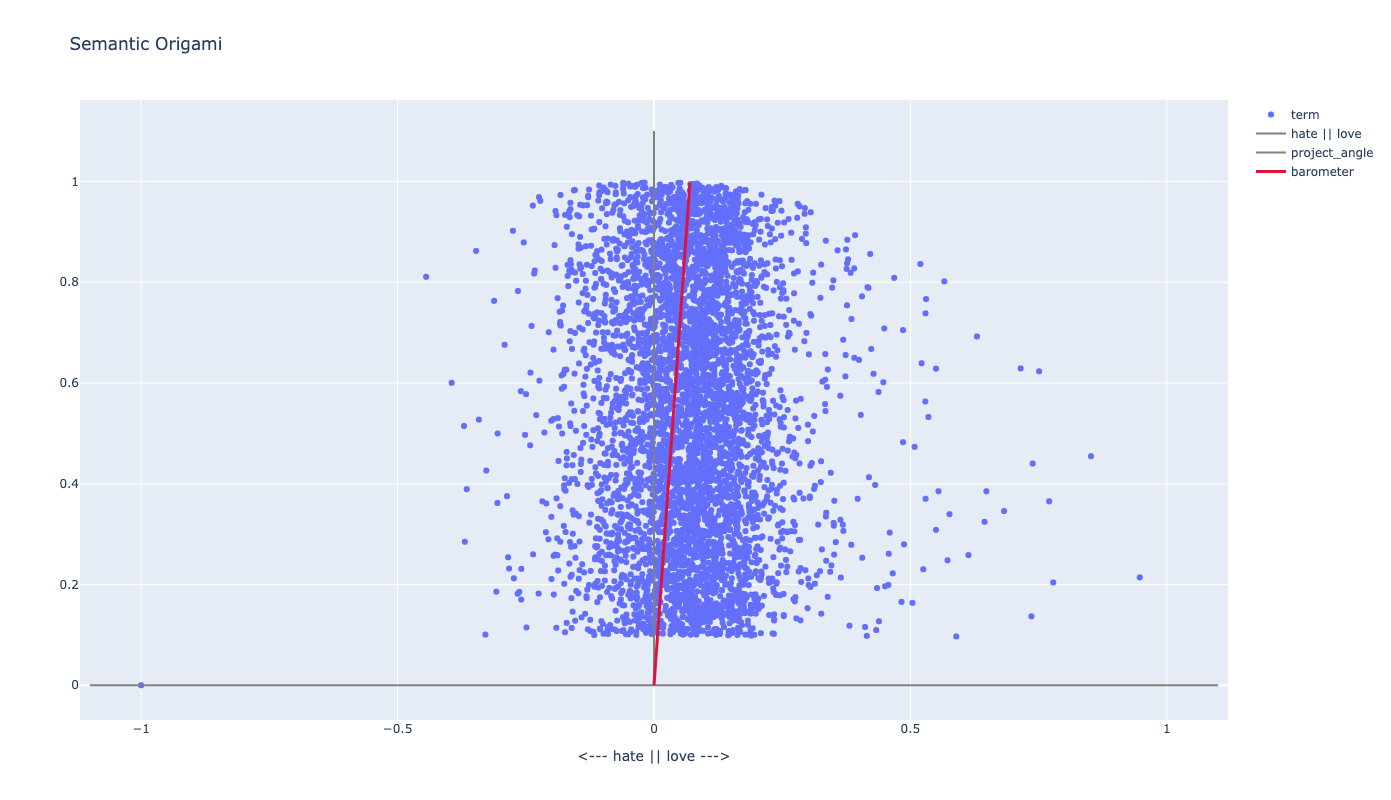

In [12]:
left_axis = ['love']
right_axis = ['hate']

fig = bunka.origami_projection_unique(
                    left_axis= left_axis,
                    right_axis = right_axis,
                    height=800,
                    width=1500,
                    type="terms",
                    dispersion=True,
                    barometer=True,
                    explainer = True
    
                )
fig.show()

In [19]:
import numpy as np

In [8]:
import plotly
plotly.offline.plot(fig, filename='/Users/charlesdedampierre/Desktop/ENS Projects/chinese_fiction/barometer.html')

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


'/Users/charlesdedampierre/Desktop/ENS Projects/chinese_fiction/barometer.html'

In [38]:
test = bunka.proj_docs

from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler = MinMaxScaler(feature_range=(-1, 1))
test['dim_norm'] = scaler.fit_transform(test[['hate || love']])
test['project_new'] = np.sqrt(1 - test['dim_norm'] ** 2)  # Pythagore

In [40]:
test['dim_norm'].mean()

-0.20707309246063232

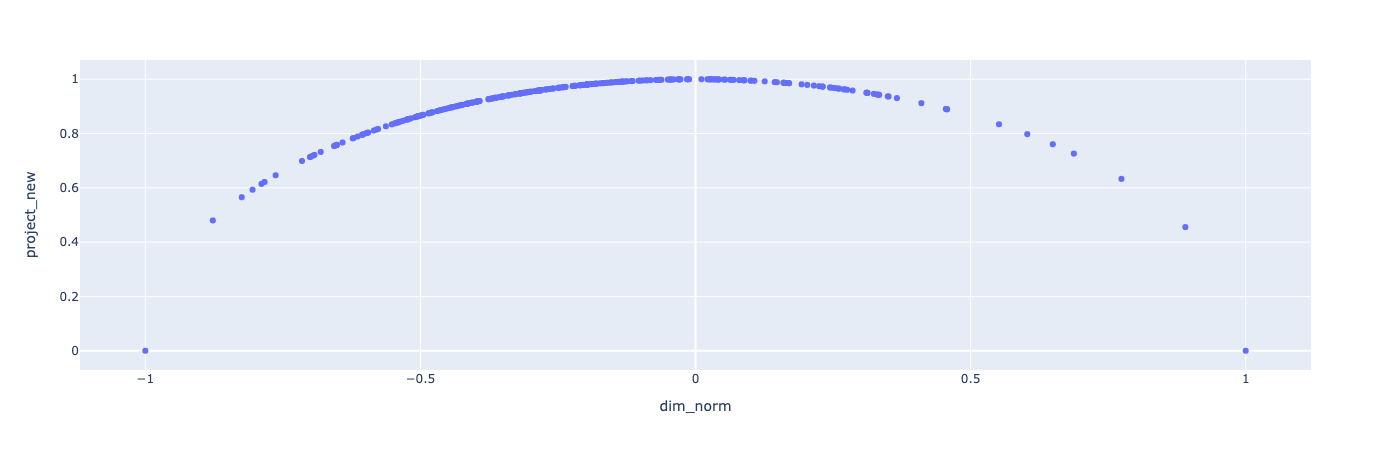

In [42]:
import plotly.express as px
fig = px.scatter(test, x='dim_norm', y='project_new')
fig

#### Plot with the explainer

In [54]:
import plotly.graph_objs as go
import numpy as np

barometer = True
fig = go.Figure()

# Plot two axes x and y to visualisy scale the results (like PCA projection)
trace_1 = go.Scatter(
    x=[-1.1, 1.1],
    y=[0, 0],
    mode="lines",
    line_color="grey",
    name=projection_str_1,
)

trace_2 = go.Scatter(
    x=[0, 0],
    y=[0, 1.1],
    mode="lines",
    line_color="grey",
    name="project_angle",
)

# Plot the elements
trace_scatter = go.Scatter(
    x=fin[projection_str_1],
    y=fin["project_angle"],
    text=fin["text_explained"],
    mode="markers",
)

fig.add_trace(trace_scatter)
fig.add_trace(trace_1)
fig.add_trace(trace_2)

if barometer:
    # Get the barometer Line
    baro_mean = fin[projection_str_1].mean()
    baro_mean_angle = np.sqrt(1 - baro_mean**2)
    trace_barometer = go.Scatter(
        x=[0.0, baro_mean, None],
        y=[0.0, baro_mean_angle, None],
        mode="lines",
        line_width=3,
        line_color="crimson",
        name="barometer",
    )
    fig.add_trace(trace_barometer)

fig.update_layout(
    title="Semantic Origami",
    height=1500,
    width=2500,
    xaxis_title="<--- " + projection_str_1 + " --->",
)

import plotly
plotly.offline.plot(fig, filename='/Users/charlesdedampierre/Desktop/ENS Projects/chinese_fiction/barometer.html')

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


'/Users/charlesdedampierre/Desktop/ENS Projects/chinese_fiction/barometer.html'

#### Rework the origami embedding

In [26]:
#df_terms_bert = bunka.df_bert

In [15]:
left_axis= ['past', 'before', 'in the past', "ancient"]
right_axis = ['future', 'future-oriented', 'later', 'in the future']

In [16]:
projection_1 = left_axis + right_axis

In [20]:
projection_str_1 = "-".join(left_axis) + ' || ' + "-".join(right_axis)

In [22]:
# embed the new words

In [25]:
df_bert = bunka.compute_projection_embeddings(projection_1)

2022-03-22 18:22:47,936 - INFO : Load pretrained SentenceTransformer: all-MiniLM-L6-v2
2022-03-22 18:22:53,577 - INFO : Use pytorch device: cpu


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [34]:
df_proj = df_bert[projection_1]
df_proj[projection_str_1] = df_proj[left_axis].mean(axis=1) - df_proj[right_axis].mean(axis=1)

In [42]:
projection_str_1

'past-before-in the past-ancient || future-future-oriented-later-in the future'

In [28]:
df_proj

past    before  in the past   ancient    future  \
sun wukong       0.152241  0.150206     0.141401  0.224954  0.245187   
monkey king      0.226067  0.241585     0.206599  0.313821  0.226413   
tang seng        0.207471  0.178713     0.146413  0.202839  0.230720   
tang dynasty     0.278705  0.205525     0.234605  0.399381  0.259768   
zhu bajie        0.189587  0.192834     0.186363  0.229367  0.225793   
...                   ...       ...          ...       ...       ...   
future-oriented  0.226061  0.152095     0.216983  0.221991  0.694178   
later            0.486967  0.555324     0.393898  0.255216  0.499593   
in the future    0.360230  0.386442     0.563173  0.271894  0.792032   
woman            0.254359  0.156718     0.186900  0.272525  0.259475   
man              0.360155  0.307405     0.327269  0.158176  0.229286   

                 future-oriented     later  in the future  
sun wukong              0.118858  0.174533       0.180453  
monkey king             0.053104  0.183605       0.141234  
tang seng               0.120170  0.183322       0.185001  
tang dynasty            0.134955  0.180222       0.201354  
zhu bajie               0.118962  0.218307       0.189072  
...                          ...       ...            ...  
future-oriented         1.000000  0.307299       0.607011  
later                   0.307299  1.000000       0.494766  
in the future           0.607011  0.494766       1.000000  
woman                   0.101649  0.239389       0.163599  
man                     0.063902  0.287387       0.223482  

[6135 rows x 8 columns]

2022-03-22 19:03:49,869 - INFO : Load pretrained SentenceTransformer: all-MiniLM-L6-v2
2022-03-22 19:03:55,568 - INFO : Use pytorch device: cpu


Batches:   0%|          | 0/1 [00:00<?, ?it/s]

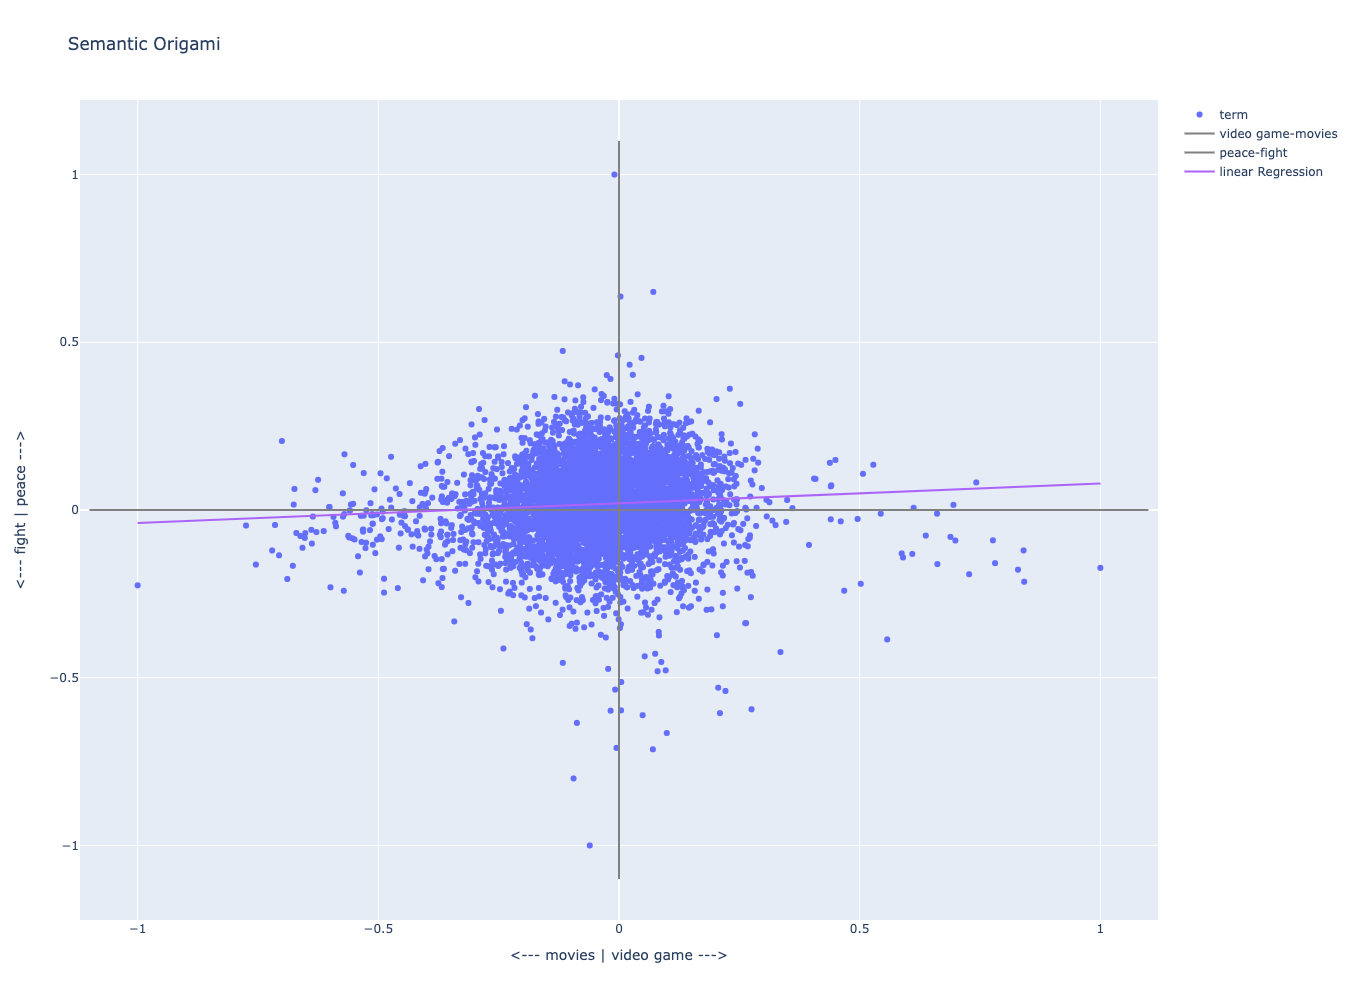

In [55]:
fig = bunka.origami_projection(projection_1=['video game', 'movies'],
                                projection_2 = ["peace", "fight"],
                                height = 1000,
                                width = 1000,
                                regression=True,
                                type="terms")
fig.show()

In [18]:
import plotly

In [19]:
fig = bunka.fit_draw(
            variables=["main form"],
            top_n=500,
            global_filter=0.2,
            n_neighbours=6,
            method="node2vec",
            n_cluster=10,
            bin_number=30,
            black_hole_force=3,
            color="community",
            size="size",
            symbol="entity",
            textfont_size=9,
            edge_size=1,
            height=2000,
            width=2000,
            template="plotly_dark",
        )

plotly.offline.plot(fig, filename='chinese_fictions_light_node2vec_english.html')

Computing transition probabilities:   0%|          | 0/500 [00:00<?, ?it/s]

Generating walks (CPU: 10): 100%|██████████| 1/1 [00:00<00:00,  8.01it/s]
2022-03-21 21:18:43,315 - INFO : collecting all words and their counts
2022-03-21 21:18:43,315 - INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-03-21 21:18:43,353 - INFO : collected 500 word types from a corpus of 400000 raw words and 5000 sentences
2022-03-21 21:18:43,354 - INFO : Creating a fresh vocabulary
2022-03-21 21:18:43,355 - INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 500 unique words (100.0%% of original 500, drops 0)', 'datetime': '2022-03-21T21:18:43.355544', 'gensim': '4.1.2', 'python': '3.9.7 (default, Sep 16 2021, 08:50:36) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'prepare_vocab'}
2022-03-21 21:18:43,355 - INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 400000 word corpus (100.0%% of original 400000, drops 0)', 'datetime': '2022-03-21T21:18:43.355851', 'gensim': '4.1.2', 'python': '3.9.

Computing transition probabilities:   0%|          | 0/510 [00:00<?, ?it/s]

Generating walks (CPU: 10): 100%|██████████| 1/1 [00:00<00:00,  5.13it/s]
2022-03-21 21:19:04,693 - INFO : collecting all words and their counts
2022-03-21 21:19:04,693 - INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2022-03-21 21:19:04,732 - INFO : collected 510 word types from a corpus of 408000 raw words and 5100 sentences
2022-03-21 21:19:04,732 - INFO : Creating a fresh vocabulary
2022-03-21 21:19:04,733 - INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 510 unique words (100.0%% of original 510, drops 0)', 'datetime': '2022-03-21T21:19:04.733899', 'gensim': '4.1.2', 'python': '3.9.7 (default, Sep 16 2021, 08:50:36) \n[Clang 10.0.0 ]', 'platform': 'macOS-10.16-x86_64-i386-64bit', 'event': 'prepare_vocab'}
2022-03-21 21:19:04,734 - INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 408000 word corpus (100.0%% of original 408000, drops 0)', 'datetime': '2022-03-21T21:19:04.734142', 'gensim': '4.1.2', 'python': '3.9.

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


'chinese_fictions_light_node2vec_english.html'

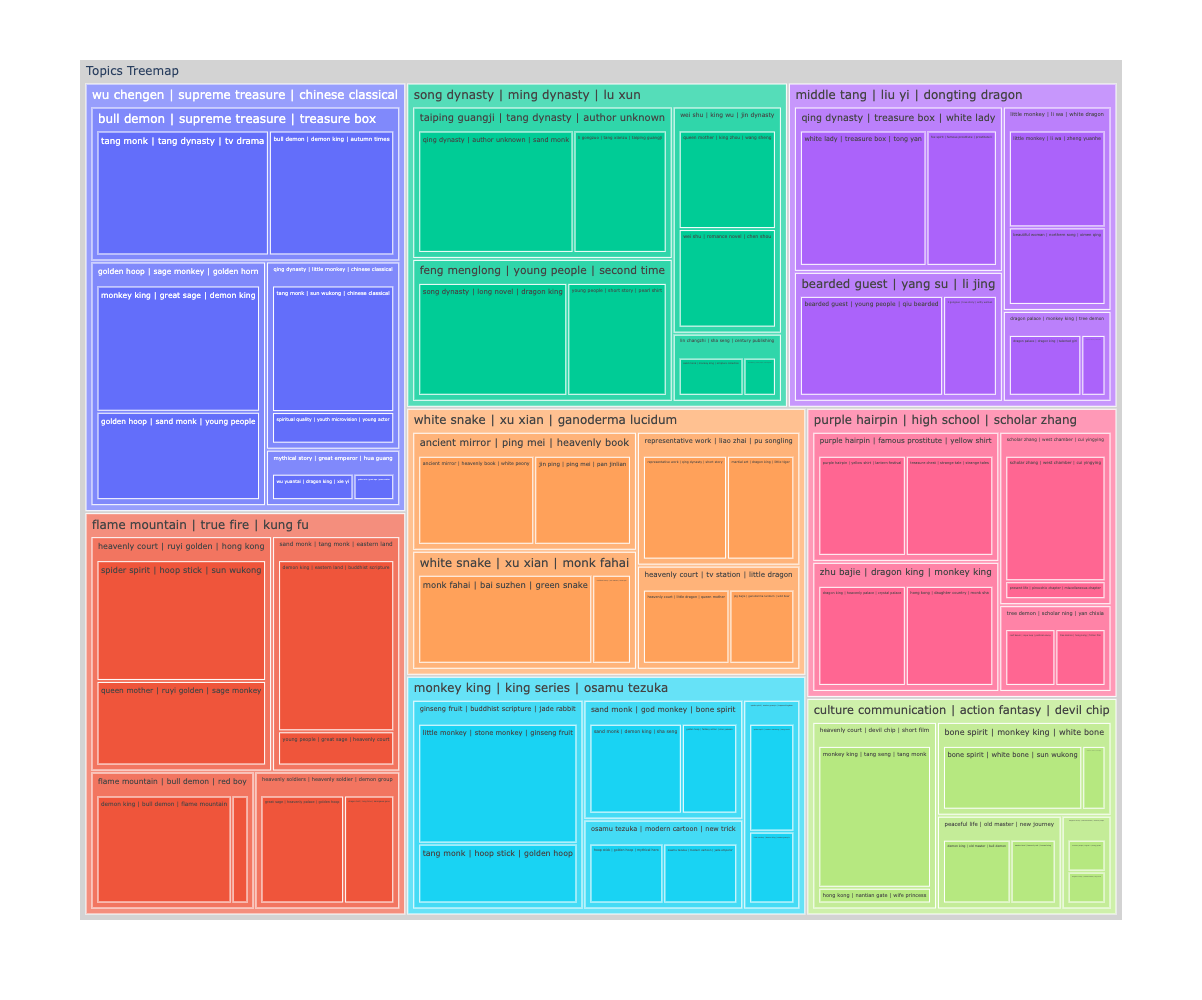

In [25]:
fig_nested = bunka.nested_maps(
            size_rule="docs_size",
            map_type="treemap",
            width=1000,
            height=1000,
            query=None,
        )

fig_nested.show()

In [9]:
lang = textacy.load_spacy_lang("zh_core_web_sm", disable=())

In [74]:
res = []
for text in tqdm(data['text_chinese'], total = len(data['text_chinese'])):
    doc = textacy.make_spacy_doc(text, lang=lang)
    
    ngrams_terms = list(
            textacy.extract.terms(
                doc,
                ngs=partial(
                    textacy.extract.ngrams,
                    n=(1,2),
                    filter_punct=True,
                    filter_stops=True,
                ),
                dedupe=False,
            )
        )
    """
    ents_terms = list(
            textacy.extract.terms(
                doc,
                ents=partial(textacy.extract.entities),
                dedupe=False,
            )
        )
    """
    
    final_ents = [item.text for sublist in ngrams_terms for item in sublist]
    res.append(final_ents)

  0%|          | 0/307 [00:00<?, ?it/s]

In [75]:
df_terms = pd.DataFrame(res)
df_terms['bindex'] = df_terms.index
fin_terms = df_terms.melt('bindex')

In [82]:
terms = fin_terms.groupby('value')['variable'].count().reset_index()
terms = terms.sort_values('variable', ascending=False).reset_index(drop=True)
terms.columns = ['terms', 'count_terms']
terms.to_csv('/Users/charlesdedampierre/Desktop/ENS Projects/chinese_fiction/top_terms.csv')

In [99]:
df_indexed = fin_terms.copy().drop('variable', axis=1).dropna()
df_indexed.columns = ['bindex', 'terms']


In [100]:
from bunkatech.networks.networks_class import SemanticNetworks

In [101]:
net = SemanticNetworks(data,
                    text_var = 'text_chinese',
                    index_var = 'index',
                    extract_terms=False,
                    terms_embedding=False,
                    docs_embedding=False,
                    sample_size_terms=500,
                    terms_limit=500,
                    terms_ents=True,
                    terms_ngrams=(1, 2),
                    terms_ncs=True,
                    terms_include_pos=["NOUN", "PROPN", "ADJ"],
                    terms_include_types=["PERSON", "ORG"],
                    terms_embedding_model="distiluse-base-multilingual-cased-v1",
                    docs_embedding_model="tfidf",
                    language="en",
                    terms_path=None,
                    terms_embeddings_path=None,
                    docs_embeddings_path=None)

In [107]:
net.data_network = df_indexed.copy()
net.index_var = 'bindex'
net.variables = ['terms']

In [116]:
res = net.coocurrence_multiple()
res_top = net.get_top_nodes(top_n=300)
res_weight = net.weight_to_similarity(
            global_filter=0.2, n_neighbours=6
        )

In [137]:
res_compute = net.compute_network(
            density=3,
            bin_number=30,
            method='node2vec',
            n_cluster=10,
        )

Computing transition probabilities:   0%|          | 0/300 [00:00<?, ?it/s]

Generating walks (CPU: 10): 100%|██████████| 1/1 [00:00<00:00, 11.27it/s]


Computing transition probabilities:   0%|          | 0/310 [00:00<?, ?it/s]

Generating walks (CPU: 10): 100%|██████████| 1/1 [00:00<00:00,  9.84it/s]


In [138]:
fig = net.draw_network(
            color="community",
            size="size",
            symbol="entity",
            textfont_size=9,
            edge_size=1,
            height_att=2000,
            width_att=2000,
            template="plotly_white",
        )


In [139]:
import plotly
plotly.offline.plot(fig, filename='chinese_fictions_light_node2vec.html')

'chinese_fictions_light_node2vec.html'